In [50]:
import pandas as pd

from utils.model_utils import *

In [51]:
data_df = pd.read_csv("data/nearest_places_mapping.csv")
print(data_df.shape)
data_df.head(5)

(4498, 10)


,location_name_1,N_1,E_1,X_1,Y_1,location_name_2,N_2,E_2,X_2,Y_2
0,grab_1216908647.318,4994.928,-3023.441,-2892.030,5058.007,grab_1216904541.487,4993.276,-3019.528,-2888.173,5056.267
1,grab_1216908662.125,4991.210,-3017.480,-2886.182,5054.156,grab_1216908018.296,4988.612,-3018.339,-2887.100,5051.583
2,grab_1216908678.463,4987.743,-3012.651,-2881.456,5050.583,grab_1216908016.595,4986.539,-3014.175,-2883.003,5049.416
3,grab_1216908679.824,4985.295,-3008.686,-2877.566,5048.046,grab_1216904557.318,4984.349,-3008.709,-2877.612,5047.102
4,grab_1216908680.845,4983.482,-3004.505,-2873.445,5046.139,grab_1216904558.844,4982.276,-3004.523,-2873.492,5044.936


In [3]:
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df = data_df.head(1000)

In [4]:
# load the best model with PCA (trained by SFRS)
model = load_model("OpenIBL")

Using cache found in C:\Users\barte/.cache\torch\hub\yxgeee_OpenIBL_master
c:\Users\barte\anaconda3\envs\pikebot\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\barte\anaconda3\envs\pikebot\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [6]:
embeddings_df = extract_location_embeddings_OpenIBL(data_df, model)
embeddings_df.head()

Processing Locations: 100%|██████████| 1873/1873 [05:29<00:00,  5.68it/s]


,location_name,view,embedding
0,grab_1216908961.457,0,"[0.013391036, 0.001054178, 0.0051894095, -0.01..."
1,grab_1216908961.457,1,"[0.012341744, -0.009715241, 0.005241199, 0.007..."
2,grab_1216908961.457,2,"[0.014639699, 0.0055779624, 0.0053596674, -0.0..."
3,grab_1216908961.457,3,"[0.022192052, 0.0036399455, 0.012123194, -0.01..."
4,grab_1216908961.457,4,"[0.020754913, 0.0026305944, 0.013091101, -0.00..."


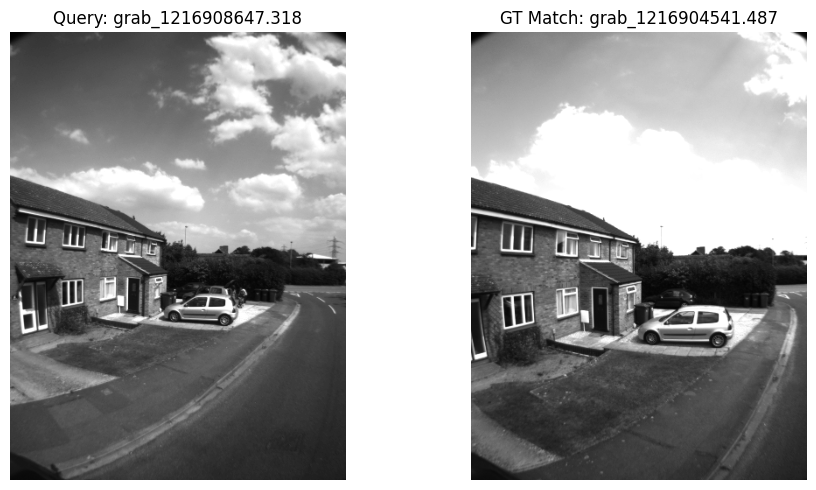

In [52]:
display_gt_pair(data_df, 0, 1)

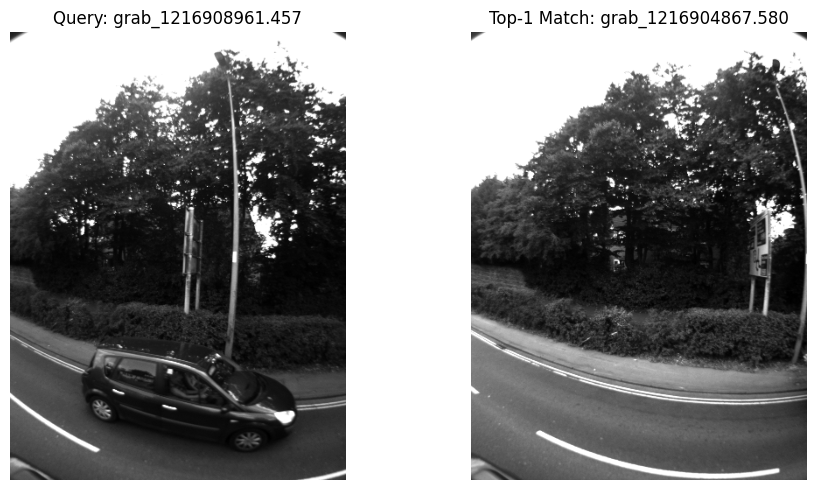

In [53]:
closest = search_closest("grab_1216908961.457", 1, embeddings_df, base_df=data_df, show=True)

In [54]:
results = evaluate_accuracy_per_view(data_df, embeddings_df)

Calculating results for view 0: 4498it [00:14, 303.45it/s]
Calculating results for view 1: 4498it [00:13, 343.76it/s]
Calculating results for view 2: 4498it [00:13, 343.73it/s]
Calculating results for view 3: 4498it [00:14, 321.11it/s]
Calculating results for view 4: 4498it [00:12, 356.06it/s]


In [55]:
results

{0: {'top1_accuracy': 0.633,
  'top5_accuracy': 0.796,
  'top10_accuracy': 0.836,
  'count': 1000},
 1: {'top1_accuracy': 0.633,
  'top5_accuracy': 0.799,
  'top10_accuracy': 0.841,
  'count': 1000},
 2: {'top1_accuracy': 0.637,
  'top5_accuracy': 0.803,
  'top10_accuracy': 0.841,
  'count': 1000},
 3: {'top1_accuracy': 0.62,
  'top5_accuracy': 0.744,
  'top10_accuracy': 0.778,
  'count': 1000},
 4: {'top1_accuracy': 0.607,
  'top5_accuracy': 0.741,
  'top10_accuracy': 0.78,
  'count': 1000}}